### 1. Importing the Modules

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore") # ignoring wranings


In [3]:
import plotly.express as px

In [4]:
from plotnine import ggplot, aes, geom_point

In [5]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

### 2. Reading the Dataset

In [6]:
data=pd.read_csv("/Users/bididudy/Downloads/MeriSKILL projects/Project 2  - Diabetes/diabetes.csv")
df = data.copy() #creating a copy of dataset

In [7]:
#getting shape of dataset provided
df.shape

(768, 9)

### 3. Checking First 5 and last 5 rows of DataSet

In [8]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [9]:
df.tail()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1
767,1,93,70,31,0,30.4,0.315,23,0


### 4. Checking number of features and their Datatypes.

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [11]:
#getting statistical summary of data
df.describe(include = "all")

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


### 5. Data Cleaning

In [12]:
#checking for duplicates in data
df.duplicated().sum()

0

#### We have no null values in dataset

In [13]:
df.nunique()

Pregnancies                  17
Glucose                     136
BloodPressure                47
SkinThickness                51
Insulin                     186
BMI                         248
DiabetesPedigreeFunction    517
Age                          52
Outcome                       2
dtype: int64

In [14]:
#viewing the unique values in each variables
pd.Series({c: df[c].unique() for c in df})

Pregnancies                 [6, 1, 8, 0, 5, 3, 10, 2, 4, 7, 9, 11, 13, 15,...
Glucose                     [148, 85, 183, 89, 137, 116, 78, 115, 197, 125...
BloodPressure               [72, 66, 64, 40, 74, 50, 0, 70, 96, 92, 80, 60...
SkinThickness               [35, 29, 0, 23, 32, 45, 19, 47, 38, 30, 41, 33...
Insulin                     [0, 94, 168, 88, 543, 846, 175, 230, 83, 96, 2...
BMI                         [33.6, 26.6, 23.3, 28.1, 43.1, 25.6, 31.0, 35....
DiabetesPedigreeFunction    [0.627, 0.351, 0.672, 0.167, 2.288, 0.201, 0.2...
Age                         [50, 31, 32, 21, 33, 30, 26, 29, 53, 54, 34, 5...
Outcome                                                                [1, 0]
dtype: object

In [15]:
for c in df.columns:
    print("---- %s ---" % c)
    print(df[c].value_counts())

---- Pregnancies ---
Pregnancies
1     135
0     111
2     103
3      75
4      68
5      57
6      50
7      45
8      38
9      28
10     24
11     11
13     10
12      9
14      2
15      1
17      1
Name: count, dtype: int64
---- Glucose ---
Glucose
99     17
100    17
111    14
129    14
125    14
       ..
191     1
177     1
44      1
62      1
190     1
Name: count, Length: 136, dtype: int64
---- BloodPressure ---
BloodPressure
70     57
74     52
78     45
68     45
72     44
64     43
80     40
76     39
60     37
0      35
62     34
66     30
82     30
88     25
84     23
90     22
86     21
58     21
50     13
56     12
52     11
54     11
75      8
92      8
65      7
85      6
94      6
48      5
96      4
44      4
100     3
106     3
98      3
110     3
55      2
108     2
104     2
46      2
30      2
122     1
95      1
102     1
61      1
24      1
38      1
40      1
114     1
Name: count, dtype: int64
---- SkinThickness ---
SkinThickness
0     227
32     31
30     

### 5. Exploratory Data Analysis

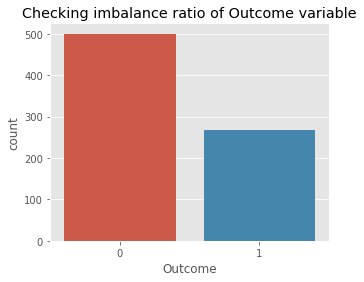

In [16]:
# checking the imbalance using countplot
plt.style.use('ggplot')
plt.figure(figsize = [5,4])

sns.countplot(data=df, x='Outcome')
plt.title("Checking imbalance ratio of Outcome variable")
plt.show()

In [17]:
# checking exact outcome Positive to outcome negative ratio
df[df.Outcome==0].shape[0]/df[df.Outcome==1].shape[0]

1.8656716417910448

#### Observations : 1 in every 2 patients is diabetic.

In [18]:
# inspecting Corona column
print(df['Outcome'].value_counts())
print()
print(df['Outcome'].value_counts(normalize=True))

Outcome
0    500
1    268
Name: count, dtype: int64

Outcome
0    0.651042
1    0.348958
Name: proportion, dtype: float64


#### Observations :
#### 65% of the patients are non diabetic.
#### 35% Patients are diabetic.

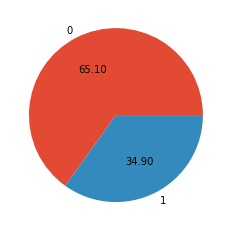

In [19]:
plt.pie(df['Outcome'].value_counts(),labels = ['0','1'],autopct = "%0.2f")
plt.show()

#### Creating new dataframe with Outcome value

In [20]:
# creating new dataframe with Corona value 
df_positive = df[df['Outcome'] == 1]
df_negative = df[df['Outcome'] == 0]

In [21]:
column_names = list({k for d in df for k in df.keys()})

print(column_names)

['BMI', 'Pregnancies', 'Insulin', 'Age', 'SkinThickness', 'DiabetesPedigreeFunction', 'Outcome', 'BloodPressure', 'Glucose']


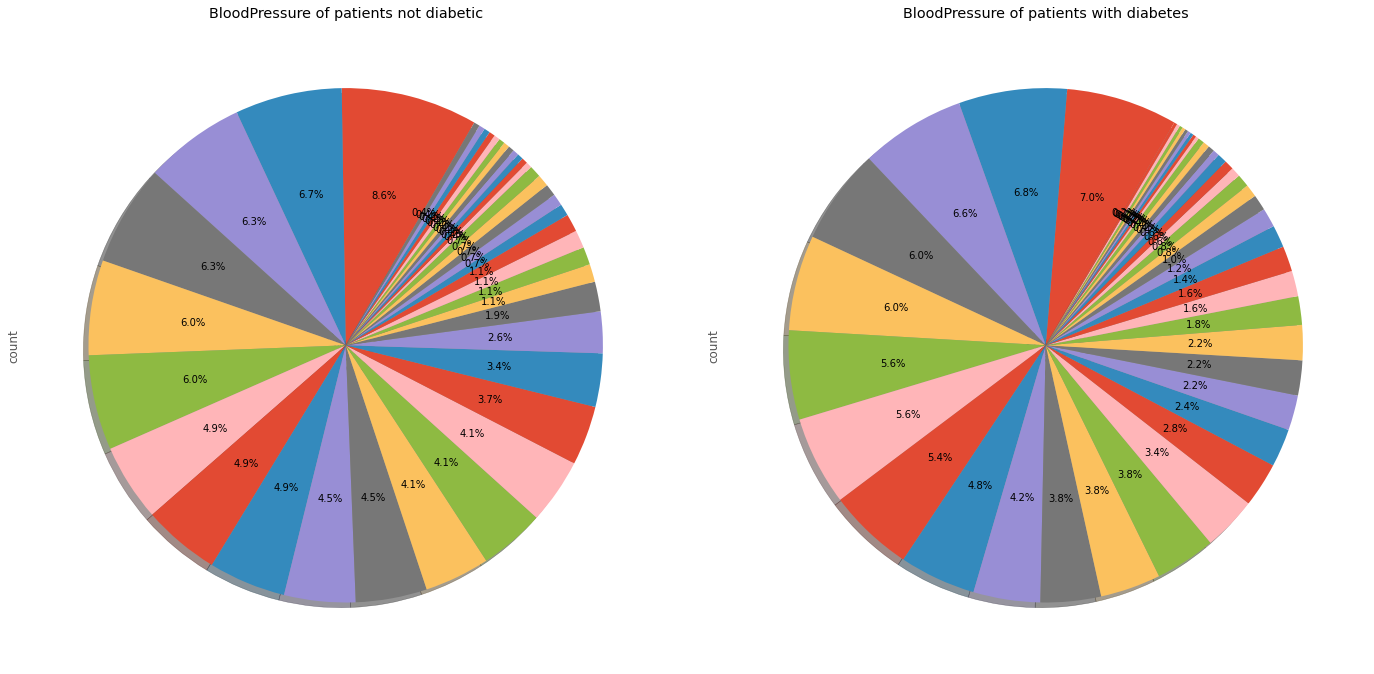

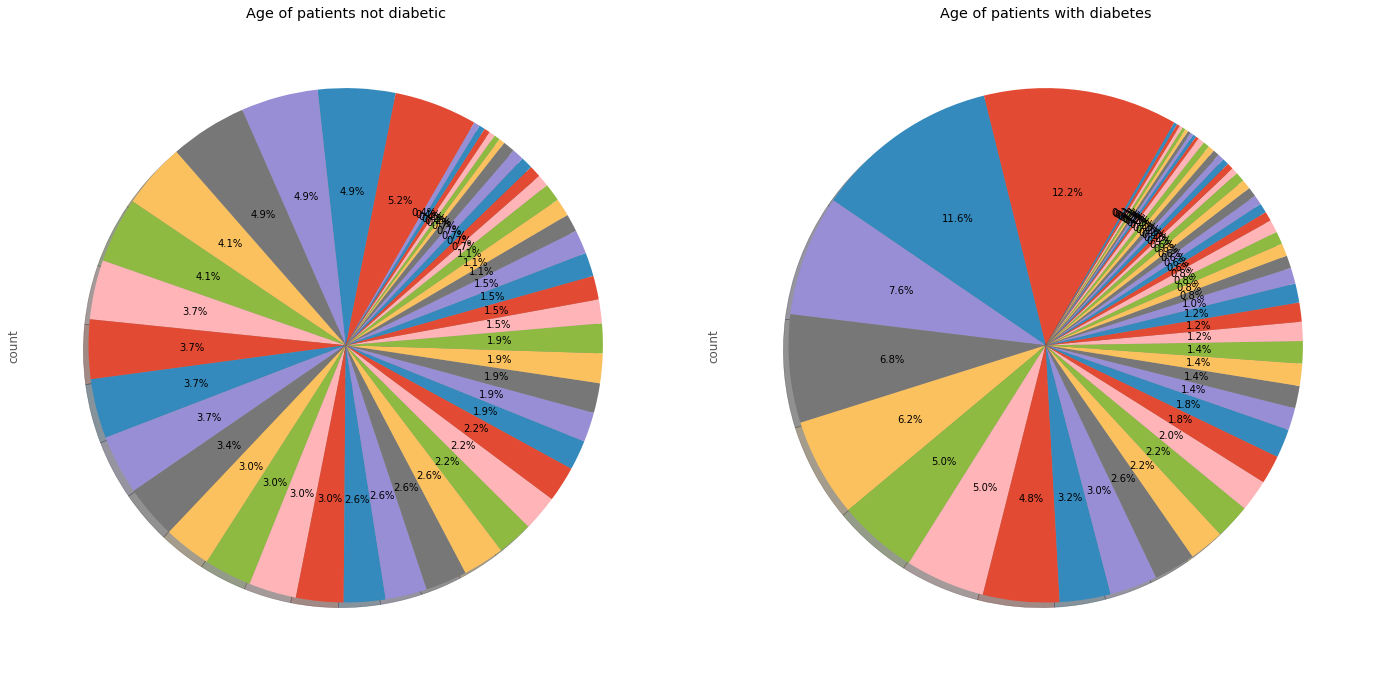

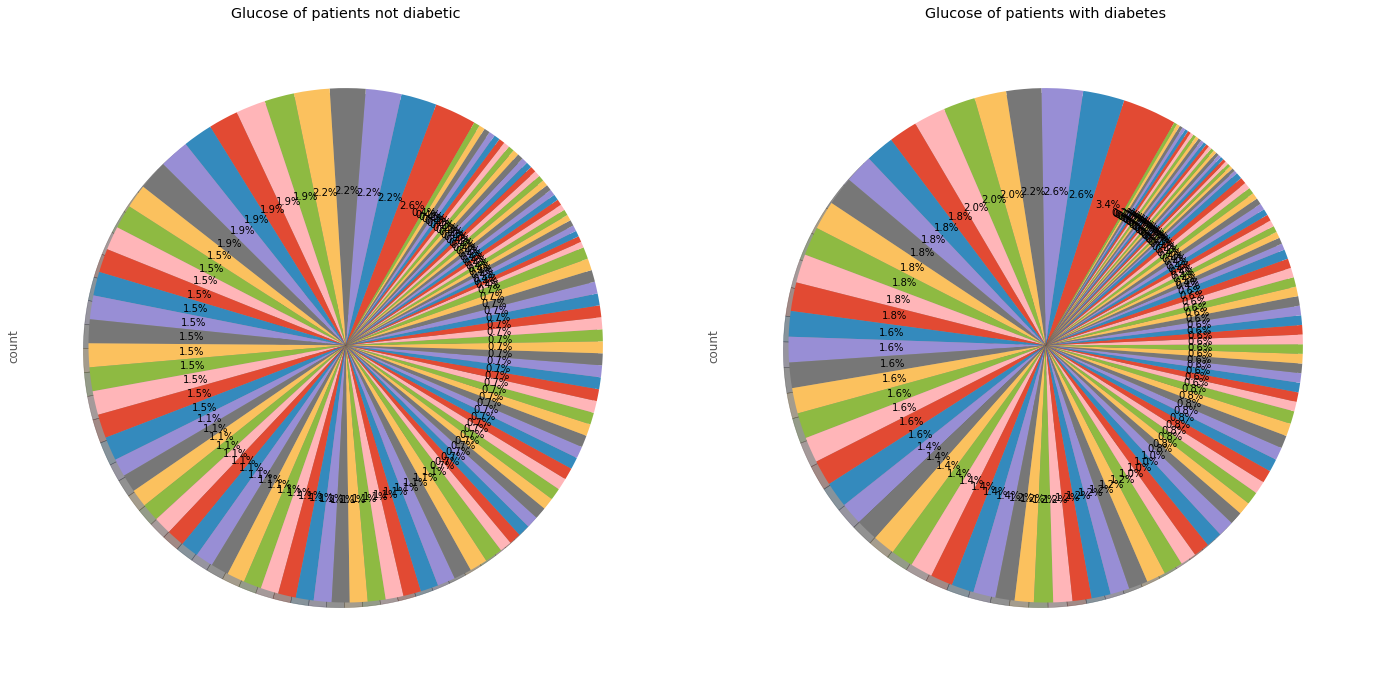

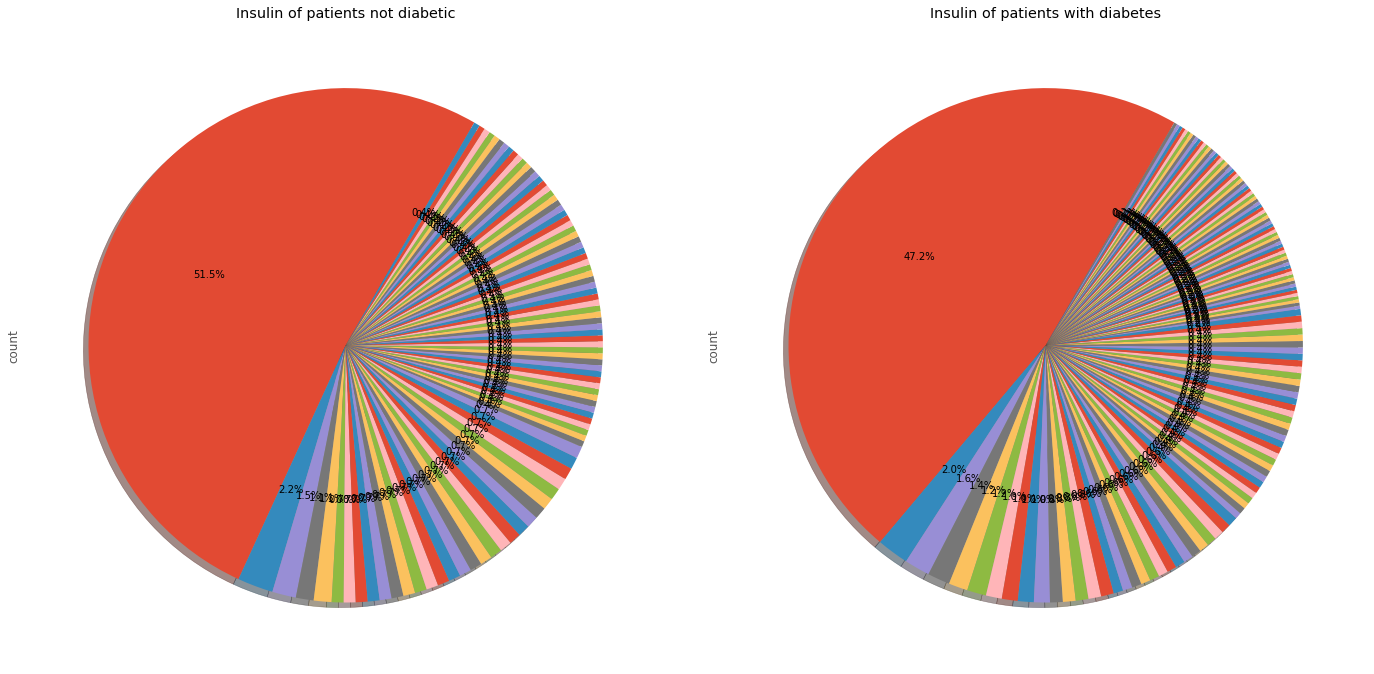

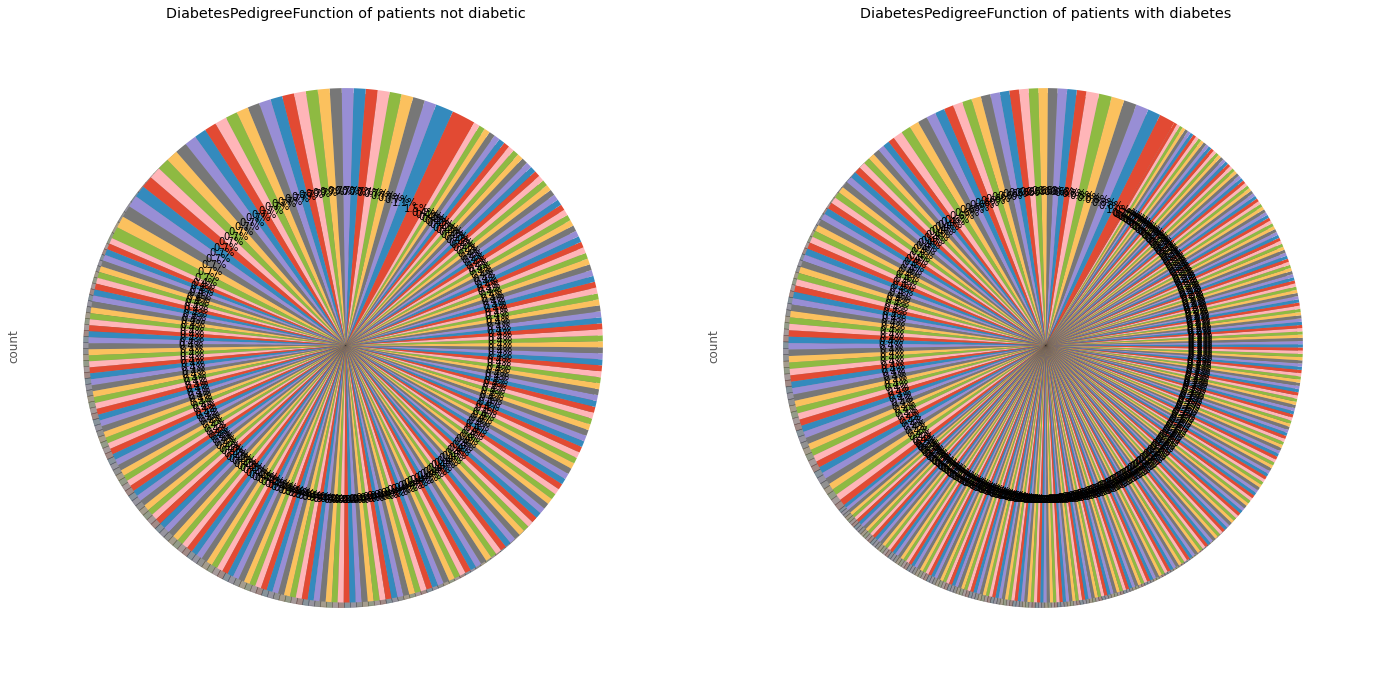

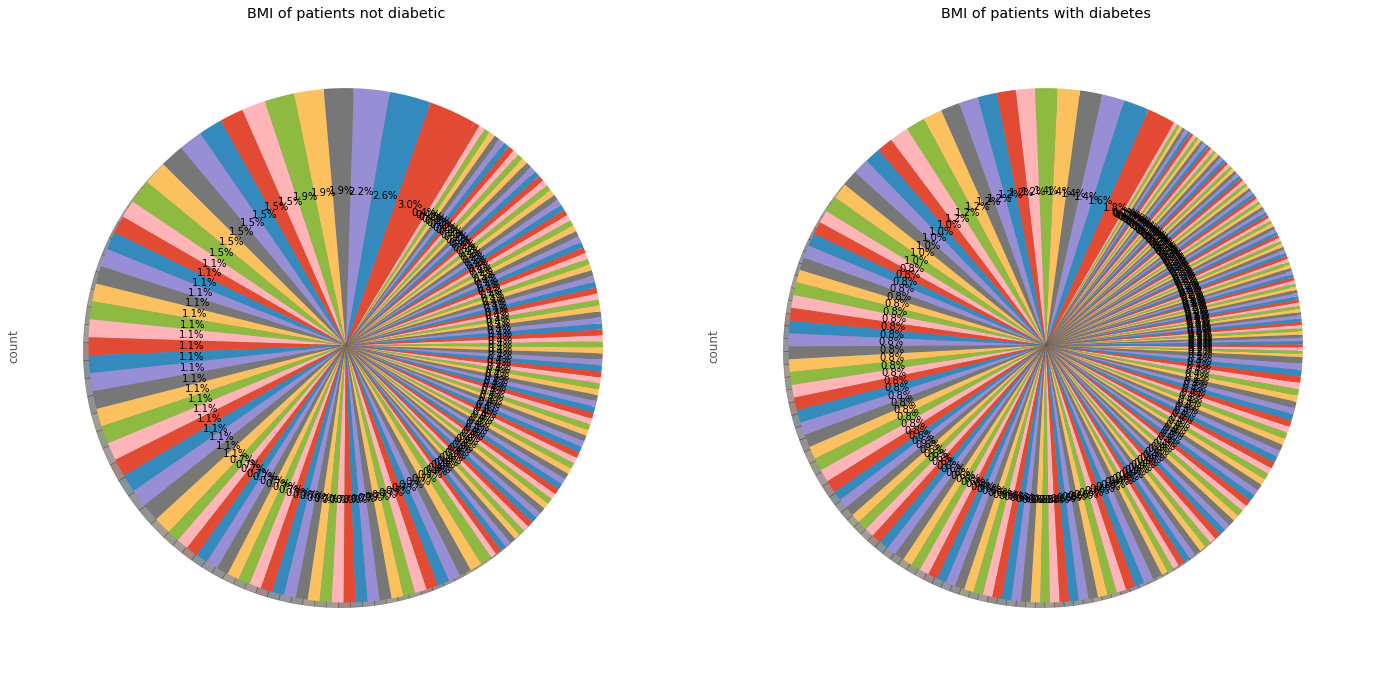

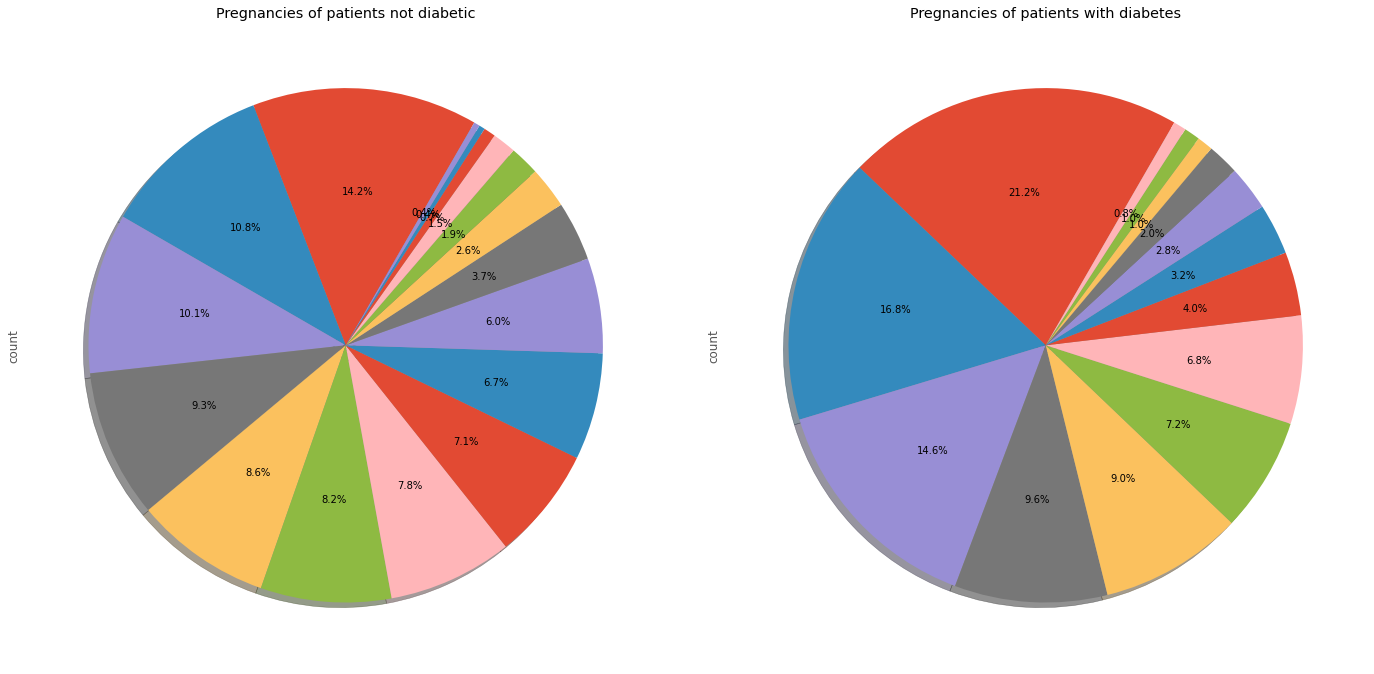

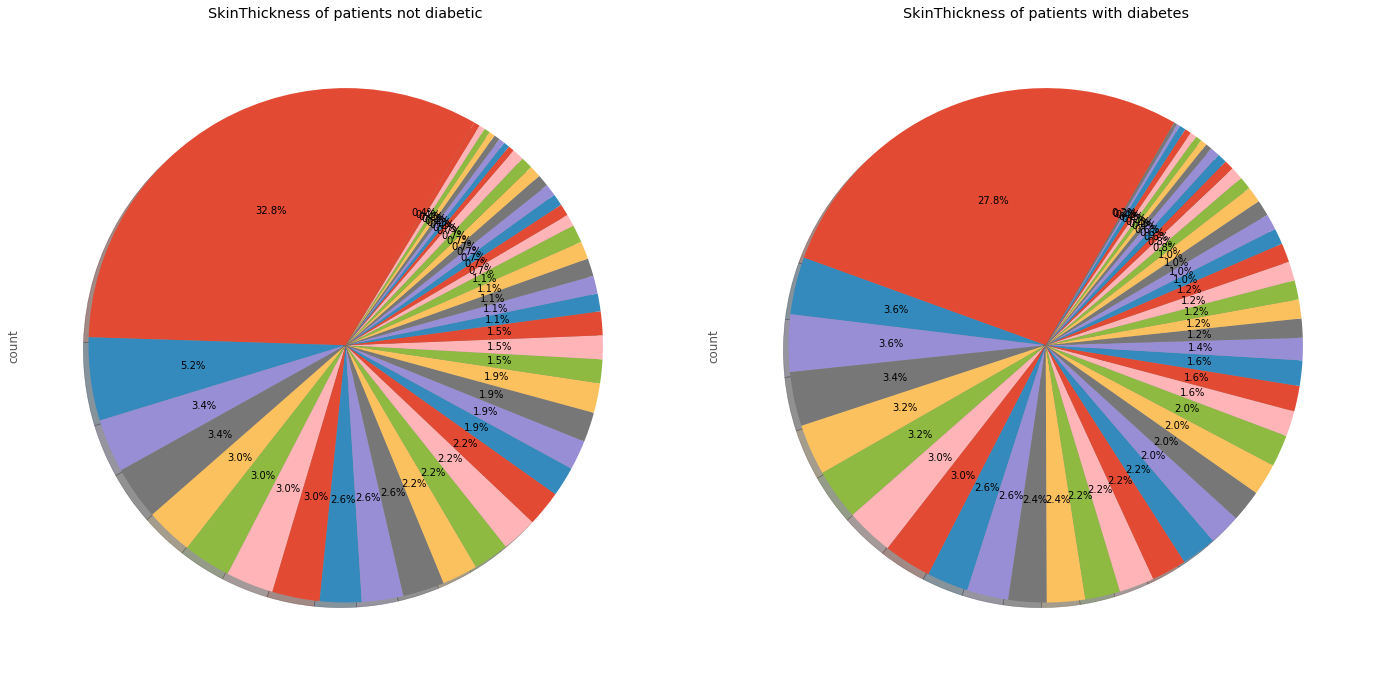

In [24]:
#plotting pie chart with symptoms and corona positive or negative 
p_plot=['BloodPressure', 'Age', 'Glucose', 'Insulin', 'DiabetesPedigreeFunction', 'BMI', 'Pregnancies', 'SkinThickness']
for i in p_plot:
    plt.style.use('ggplot')
    plt.figure(figsize = [20,12])
    # for patients diabetic
    plt.subplot(1,2,1)
    plt.title(f'{i} of patients not diabetic')
    df_positive[i].value_counts().plot.pie(autopct='%1.1f%%',shadow=True, startangle=60, labeldistance=None)
    #plt.legend()
    # for patients with corona negative
    plt.subplot(1,2,2)
    plt.title(f'{i} of patients with diabetes')
    df_negative[i].value_counts().plot.pie(autopct='%1.1f%%',shadow=True, startangle=60, labeldistance=None)
    #plt.legend()
    plt.tight_layout(pad = 4)
    plt.show()

#### correlation matrix

In [28]:
correlation=df.corr()
print(correlation)

                          Pregnancies   Glucose  BloodPressure  SkinThickness  \
Pregnancies                  1.000000  0.129459       0.141282      -0.081672   
Glucose                      0.129459  1.000000       0.152590       0.057328   
BloodPressure                0.141282  0.152590       1.000000       0.207371   
SkinThickness               -0.081672  0.057328       0.207371       1.000000   
Insulin                     -0.073535  0.331357       0.088933       0.436783   
BMI                          0.017683  0.221071       0.281805       0.392573   
DiabetesPedigreeFunction    -0.033523  0.137337       0.041265       0.183928   
Age                          0.544341  0.263514       0.239528      -0.113970   
Outcome                      0.221898  0.466581       0.065068       0.074752   

                           Insulin       BMI  DiabetesPedigreeFunction  \
Pregnancies              -0.073535  0.017683                 -0.033523   
Glucose                   0.331357  0.221

#### Visualizing the correlation

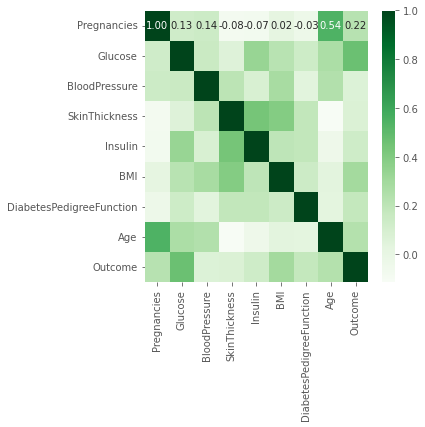

In [25]:
corr_df= df.corr()

plt.figure(figsize = (5,5))
sns.heatmap(data = corr_df, annot = True, cmap = "Greens", cbar = True, fmt='.2f')
plt.show()

### 6.Train-Test Split

In [29]:
X =df.drop("Outcome", axis=1)
Y =df['Outcome']
X_train,X_test, Y_train,Y_test =train_test_split (X,Y, test_size=0.2)

#### In X all the independent variables are stored.  In Y the predictor variable(“OUTCOME”) is stored. Train-test split is a technique used in machine learning to assess model performance. Itdivides the dataset into a training set and a testing set, with a 0.2 test size indicating that 20% of the data is used for testing and 80% for training.

#### Training The Moodel

In [30]:
model=LogisticRegression()
model.fit(X_train,Y_train)

LogisticRegression()

#### Fitting the X train and y train data into the variable called model.

#### Making Prediction

In [31]:
prediction=model.predict(X_test)
print(prediction)

[0 0 1 0 0 0 1 1 0 0 0 0 0 1 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0
 0 0 0 1 0 1 0 1 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 1 0 0 1 1 0 1 1 1 0 0 0
 1 1 0 0 0 1 0 1 0 0 0 0 1 0 1 0 1 1 0 0 0 0 1 0 0 0 1 1 1 0 1 1 1 0 0 0 0
 0 0 1 1 0 0 0 0 1 0 0 0 0 0 1 0 0 0 1 1 1 1 0 0 0 0 0 0 1 0 1 0 1 0 0 1 1
 0 0 1 0 0 1]


#### After training the model, predictions are made using the test data, which comprises 20% of the total dataset.

In [32]:
accuracy=accuracy_score(prediction,Y_test)
print(accuracy)

0.7337662337662337


#### The accuracy of the model is then calculated and determined.